# DCIT 407: Image Processing
## Project: Gaussian Noise Simulation
**Author:** Kelvin Attatsi / Group 8
**Task:** Add Gaussian noise to images and visualize the results.

---

## 1️⃣ Introduction

**Digital image noise** is the random variation of brightness or color information in images, usually an aspect of electronic noise. It can be produced by the image sensor and circuitry of a scanner or digital camera.

**Gaussian noise** is a statistical noise having a probability density function (PDF) equal to that of the normal distribution, which is also known as the Gaussian distribution. It is a common type of noise that occurs during image acquisition (e.g., sensor noise due to poor illumination or high temperature).

**Importance in Image Processing:**
- It serves as a standard model for evaluating the performance of image denoising algorithms.
- Understanding Gaussian noise helps in designing filters that can effectively restore degraded images.

**Real-world Applications:**
- Modeling noise in digital camera sensors.
- Simulating transmission errors in communication systems.
- Testing robustness of computer vision models.

## 2️⃣ Theory

### Definition of Gaussian Noise
Gaussian noise is a type of electronic noise which is characterized by its Probability Density Function (PDF) following a normal distribution. In the context of images, the noise values are added to the original pixel intensities.

### Probability Density Function (PDF)
The PDF $P(x)$ of a Gaussian random variable $x$ is given by:

$$P(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Where:
- **$\mu$ (mean):** The average value of the noise. In most image processing scenarios, the mean is assumed to be 0.
- **$\sigma$ (standard deviation):** This represents the spread or intensity of the noise. A higher $\sigma$ means more intense and visible noise.
- **$\sigma^2$ (variance):** The square of the standard deviation.

### Effect on Pixel Intensity
When Gaussian noise is added to an image, the new pixel value $I'(x,y)$ is calculated as:
$$I'(x,y) = I(x,y) + N(x,y)$$
where $I(x,y)$ is the original pixel intensity and $N(x,y)$ is a random value drawn from the Gaussian distribution.

### Additive White Gaussian Noise (AWGN)
- **Additive:** Because it is added to the original signal.
- **White:** Because it has a uniform power spectral density (like white light containing all frequencies).
- **Gaussian:** Because it follows a normal distribution.

## 3️⃣ Methodology

### Tools Used
1. **OpenCV (cv2):** Used for loading and basic image manipulation.
2. **NumPy (np):** Used for mathematical operations and generating the Gaussian distribution.
3. **Matplotlib (plt):** Used for displaying the images and plots.

### Steps Taken
1. **Load image:** Read the input image from the disk.
2. **Convert image to float:** Convert pixel values to float (0.0 to 1.0 or 0 to 255) to avoid overflow during addition.
3. **Generate Gaussian noise:** Use `np.random.normal()` to create a noise matrix of the same shape as the image.
4. **Add noise to image:** Add the generated noise matrix to the original image matrix.
5. **Clip values:** Ensure pixel values are within the valid range $[0, 255]$.
6. **Convert back to uint8:** Finalize the image format for display.
7. **Display:** Compare original vs. noisy image side-by-side.

## 4️⃣ Implementation (Python Code)

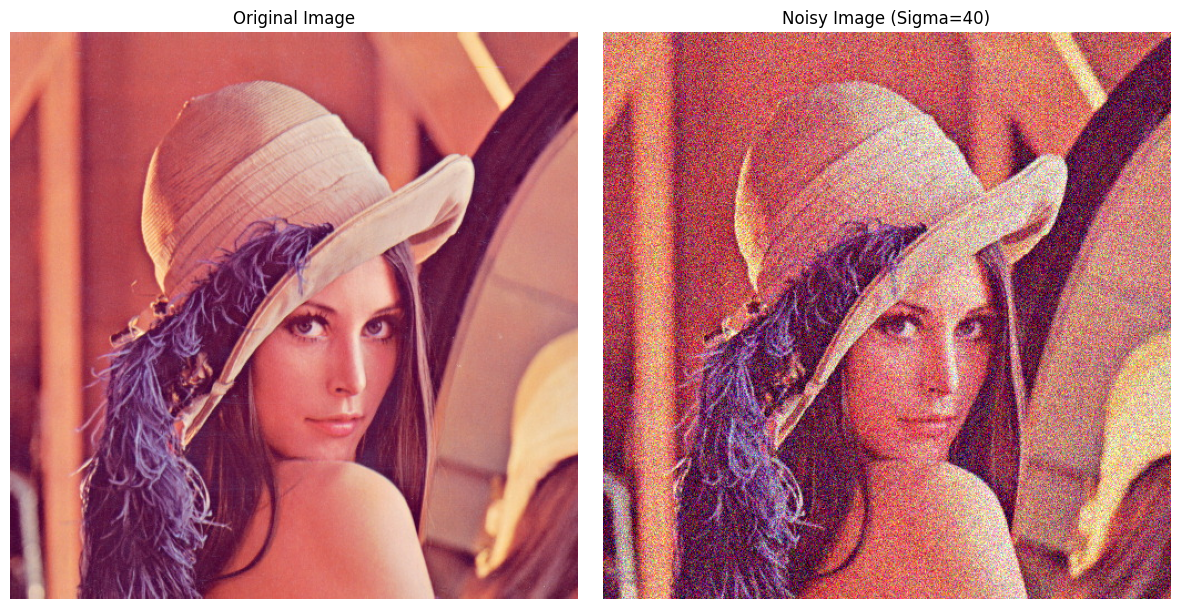

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def add_gaussian_noise(image, mean=0, sigma=25):
    img_float = image.astype(np.float32)
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = img_float + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    noisy_image = noisy_image.astype(np.uint8)
    
    return noisy_image

image_path = 'images/original/lena.jpg'
if not os.path.exists(image_path):
    print(f"Warning: {image_path} not found. Searching in local directory...")
    image_path = 'lena.jpg'

original_img = cv2.imread(image_path)

if original_img is None:
    raise FileNotFoundError("Required image 'lena.jpg' not found in specified paths.")

original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

MEAN = 0
SIGMA = 40  

noisy_img_rgb = add_gaussian_noise(original_img_rgb, MEAN, SIGMA)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_img_rgb)
plt.title(f'Noisy Image (Sigma={SIGMA})')
plt.axis('off')

plt.tight_layout()
plt.show()

## 5️⃣ Results

### Visual Comparison
The output above shows two images:
1. **Left (Original):** A clean image with smooth gradients and sharp edges.
2. **Right (Noisy):** The same image but with visible "graininess" or "snow" effect.

### Observations
- **Grainy Texture:** The pixel values fluctuate randomly, creating a speckled appearance.
- **Color Distortions:** In colorful areas, the noise affects all R, G, B channels, leading to subtle color shifts.
- **Effect of $\sigma$:**
    - As $\sigma$ increases, the noise becomes more intense.
    - Low $\sigma$ (e.g., 5-10) might be barely noticeable.
    - High $\sigma$ (e.g., 50+) can significantly obscure image details, making it difficult to recognize objects.

## 6️⃣ Discussion

### Strengths
- **Mathematical Simplicity:** Easy to model and implement using standard libraries.
- **Realism:** Closely approximates real-world electronic noise in many imaging systems.

### Limitations
- **Additive Assumption:** Not all image noise is additive. For instance, multiplicative noise (speckle noise) follows different rules.
- **Stationarity:** Gaussian noise simulated here is usually stationary (same parameters throughout the image), but real noise can be signal-dependent.

### Real-world Applications
- **Sensor Noise:** Modeling the Thermal noise in CCD/CMOS sensors.
- **Communication Systems:** Simulating data degradation over noisy channels.
- **Algorithm Testing:** Used to stress-test denoising algorithms like Mean Filters, Median Filters, and Gaussian Blurs.

### Future Scope
- This simulation is the first step towards building and testing **Denoising Autoencoders** or advanced **Wiener Filters**.

## 7️⃣ Conclusion

In this project, we successfully implemented a Gaussian noise simulation using Python's NumPy and OpenCV libraries. 

**Key Highlights:**
- We explored the mathematical foundation of Gaussian noise via its PDF.
- We implemented a robust function to add noise while handling pixel value constraints (clipping).
- We observed that increasing the standard deviation ($\sigma$) directly correlates with the severity of image degradation.

Understanding and simulating noise is a fundamental skill in image processing, as it allows engineers to build better restoration and enhancement tools.